### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 2
### Due: Saturday, Jan 25th at 11.59pm CST
---

## Problem 1

This question is about Monte Carlo integration. A standard Gaussian integral takes the form 

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx$$

1) What does this integral analytically evaluate to? (Should involve $\sigma$.) Once you work this equation out, we will refer to this equality of the integral and analytic value as EQ1. 

2) Write down the standard form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $\infty$ and $+\infty$. What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$? (Remember that the half-Gaussian distribution must be normalized such that it integrates to one.)

3) Manipulate EQ1 such that you can write the integral in terms of a function of $x$ weighted by a normalized half-Gaussian distribution. 

4) Draw $N=10^5$ samples from a $\sigma=2$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your new equation involving a half-Gaussian distribution from (3). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

5) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

6) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

### Solution

In [162]:
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import norm
import numpy as np
import math

# #1.1
From https://en.wikipedia.org/wiki/Lists_of_integrals

$$\int_{0}^{\infty} x^3 e^{-ax^2} dx = \frac{1}{2a^2} \text{ if } a>0$$
$$a = \frac{1}{2\sigma^2}$$
$$\int_{0}^{\infty} x^3 e^{-ax^2} dx = 2\sigma^4$$

# #1.2
From Lecture 5:
$$p(x|0,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-0)^2}{2\sigma^2}\right) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-x^2}{2\sigma^2}\right)$$
From https://en.wikipedia.org/wiki/Lists_of_integrals
$$\int_{-\infty}^{\infty} e^{(-ax^2+bx+c)} dx = \sqrt{\frac{\pi}{a}} \exp{[\frac{b^2-4ac}{4a}]}$$
$$ a=\frac{1}{2\sigma^2},b=0,c=0$$
$$\int_{-\infty}^{\infty} \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-x^2}{2\sigma^2}\right) dx = \frac{1}{\sigma\sqrt{2\pi}}\sqrt{\frac{\pi}{\frac{1}{2\sigma^2}}} \exp{[\frac{0^2-4\frac{1}{2\sigma^2}0}{\frac{4}{2\sigma^2}}]} = \frac{\sqrt{2\sigma^2\pi}}{\sigma\sqrt{2\pi}}\exp(0) = 1(1) = 1$$
#### Already normalized!

Corresponding half Gaussian needs a factor of 2 out front to have area still equal 1 with half the area of the previous equation $\therefore p(x|0,\sigma) = \frac{2}{\sigma\sqrt{2\pi}} \exp\left(\frac{-x^2}{2\sigma^2}\right)$

# #1.3
$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = \int_0^\infty \frac{\sigma\sqrt{2\pi}}{2} x^3\frac{2}{\sigma\sqrt{2\pi}}\exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = \int_0^\infty \frac{\sigma\sqrt{2\pi}}{2} x^3 {f_{half Gaussian}}$$

# #1.4
From Lecture 3:
$$\int_{-\infty}^{\infty} g(x) h(x)\,dx \approx \frac{1}{N}\sum_{i=1}^N g(x_i)$$

$$g(x) = x^3, h(x) = \frac{2}{\sigma\sqrt{2\pi}}\exp\left(-\frac{x^2}{2\sigma^2}\right)$$

$$\therefore \text{we pull from h(x), the normalized half Gaussian, to get the x values that will define the value of g(x), whose mean will help us evaluate the integral}$$

$$\int_0^\infty \frac{\sigma\sqrt{2\pi}}{2} x^3\frac{2}{\sigma\sqrt{2\pi}}\exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx \approx \frac{\sigma\sqrt{2\pi}}{2}\frac{1}{N}\sum_{i=1}^N (x_i)^3$$

In [185]:
pop = norm(loc=0, scale=2)
N = 100000
sigma = 2
sample = pop.rvs(N)
sample_positive = sample[np.where(sample>0)]
sample_cubed = sample_positive**3
sample_summed = np.sum(sample_cubed)
sample_scaled = sample_summed*sigma*np.sqrt(2*np.pi)/(2*len(sample_positive))

theoretical_answer = 2*sigma**4

print("Mine: ", '%.3f'%sample_scaled)
print("Theoretical: ", theoretical_answer)

Mine:  32.016
Theoretical:  32


# #1.5

In [219]:
N = [100, 1000, 10000]
n = 100

def monte_carlo_integration(N, n, sigma):
    array = []
    i = 0
    while i<n:
        sample = pop.rvs(N)
        sample_positive = sample[np.where(sample>0)]
        sample_cubed = sample_positive**3
        sample_summed = np.sum(sample_cubed)
        sample_scaled = sample_summed*sigma*np.sqrt(2*np.pi)/(2*len(sample_positive))
        array.append(sample_scaled)
        i += 1

    array = np.array(array)
    average = np.average(array)
    return average, array

results = [monte_carlo_integration(counts, n, sigma) for counts in N]
mc100 = results[0][0]
array100 = results[0][1]
mc1000 = results[1][0]
array1000 = results[1][1]
mc10000 = results[2][0]
array10000 = results[2][1]

print("100 :", "Average: %.3f"%mc100, "\nAll: ", array100)
print("\n1000 :", "Average: %.3f"%mc1000, "\nAll: ", array1000)
print("\n10000 :", "Average: %.3f"%mc10000, "\nAll: ", array10000)

100 : Average: 30.127 
All:  [29.72120587 41.77858843 31.72418045 21.6489119  44.81859982 32.99195804
 53.97665374 21.94316049 20.14245073 23.69754325 25.66118354 27.90330994
 31.91103175 22.6524013  50.06494665 21.57453738 40.24067142 41.10263249
 27.31167107 25.75507983 31.93246814 30.6144039  29.23811754 38.11089467
 25.08081755 25.59487271 21.2215436  33.07453308 29.22080751 19.81674915
 25.18437234 37.9369198  21.10041726 19.14070972 28.3390794  44.71589754
 15.95773972 18.00493705 40.38442008 37.05099205 42.18936726 23.4510351
 26.4132231  21.96222315 25.79958503 31.61409474 21.71091639 29.63608289
 44.6071104  29.90022695 27.21212707 43.91011286 21.56328409 29.65852129
 26.04515383 37.94886893 24.99064852 55.03185346 25.91650374 44.85972449
 21.12224211 29.28314075 33.75645655 21.89504166 22.09071042 43.47159499
 27.24798067 20.56293319 33.08832275 28.00526095 17.25400821 36.5774458
 36.52202496 27.72647259 21.67266808 19.91617958 28.10336984 31.56007306
 24.78997888 46.84645253

# #1.6

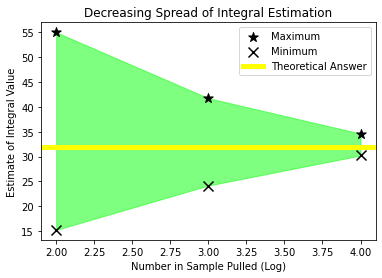

In [256]:
max100 = np.max(array100)
min100 = np.min(array100)
max1000 = np.max(array1000)
min1000 = np.min(array1000)
max10000 = np.max(array10000)
min10000 = np.min(array10000)

spread100 = max100-min100
spread1000 = max1000-min1000
spread10000 = max10000-min10000

x = [2, 3, 4]
y1 = [max100, max1000, max10000]
y2 = [min100, min1000, min10000]
plt.fill_between(x, y1=y1, y2=y2, alpha=0.5, color="lime")
plt.scatter(2, max100, marker="*", s=100, color="black", label="Maximum")
plt.scatter(2, min100, marker="x", s=100, color="black")
plt.scatter(3, max1000, marker="*", s=100, color="black")
plt.scatter(3, min1000, marker="x", s=100, color="black", label="Minimum")
plt.scatter(4, max10000, marker="*", s=100, color="black")
plt.scatter(4, min10000, marker="x", s=100, color="black")
plt.axhline(theoretical_answer, color="yellow", linewidth=5, label="Theoretical Answer")
plt.title("Decreasing Spread of Integral Estimation")
plt.xlabel("Number in Sample Pulled (Log)")
plt.ylabel("Estimate of Integral Value")
plt.legend()
plt.show()

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=150$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^5$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 150? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution

# #2.1

Draws : [ 87.20257537  93.7351505  103.20736966 119.45949929 102.71449453
  81.39511933 121.61733351 109.61271501 111.82927906  74.80184352]

PDF at 150 : 0.00010281859975274035


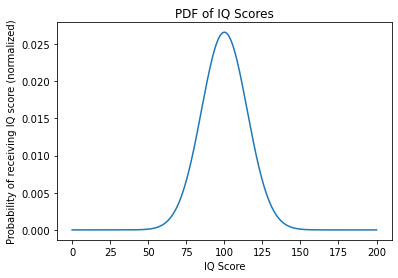

In [62]:
iq = norm(loc=100, scale=15)
xgrid = np.linspace(0, 200, 10000)
pdf = iq.pdf(xgrid)

draws = iq.rvs(10)
print("Draws :", draws)

pdf150 = iq.pdf(150)
print("\nPDF at 150 :", pdf150)

plt.plot(xgrid, pdf)
plt.title("PDF of IQ Scores")
plt.xlabel("IQ Score")
plt.ylabel("Probability of receiving IQ score (normalized)")
plt.show()

# #2.2

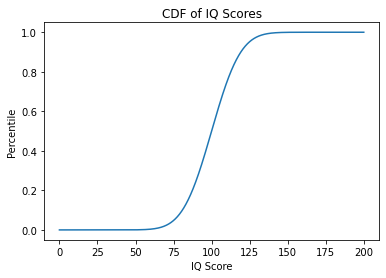

In [63]:
cdf = iq.cdf(xgrid)

plt.plot(xgrid, cdf)
plt.title("CDF of IQ Scores")
plt.xlabel("IQ Score")
plt.ylabel("Percentile")
plt.show()

In [27]:
percentiles = np.random.random(size=100000)
scores = [iq.ppf(percentile) for percentile in percentiles]

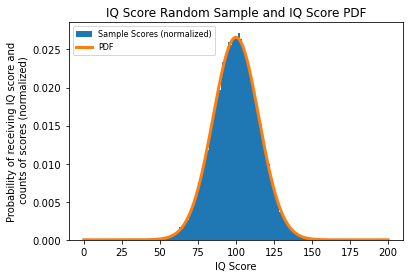

In [76]:
plt.hist(scores, bins=100, density=True, label="Sample Scores (normalized)")
plt.plot(xgrid, pdf, linewidth=3, label="PDF")
plt.title("IQ Score Random Sample and IQ Score PDF")
plt.xlabel("IQ Score")
plt.ylabel("Probability of receiving IQ score and\n counts of scores (normalized)")
plt.legend(fontsize=8, loc=2)
plt.show()

# #2.3

In [35]:
below150 = iq.cdf(150)
above150 = 1-below150
print("The percentage of people above IQ 150 =", above150*100, "%")

The percentage of people above IQ 150 = 0.04290603331967846 %


# #2.4

In [58]:
unique_high = 1-(1/1e6)
unique_low = 1/1e6
unique_score_high = iq.ppf(unique_high)
unique_score_low = iq.ppf(unique_low)
print("A one in a million score is", "%.3f"%unique_score_high, "or", "%.3f"%unique_score_low)

A one in a million score is 171.301 or 28.699


## Problem 3

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

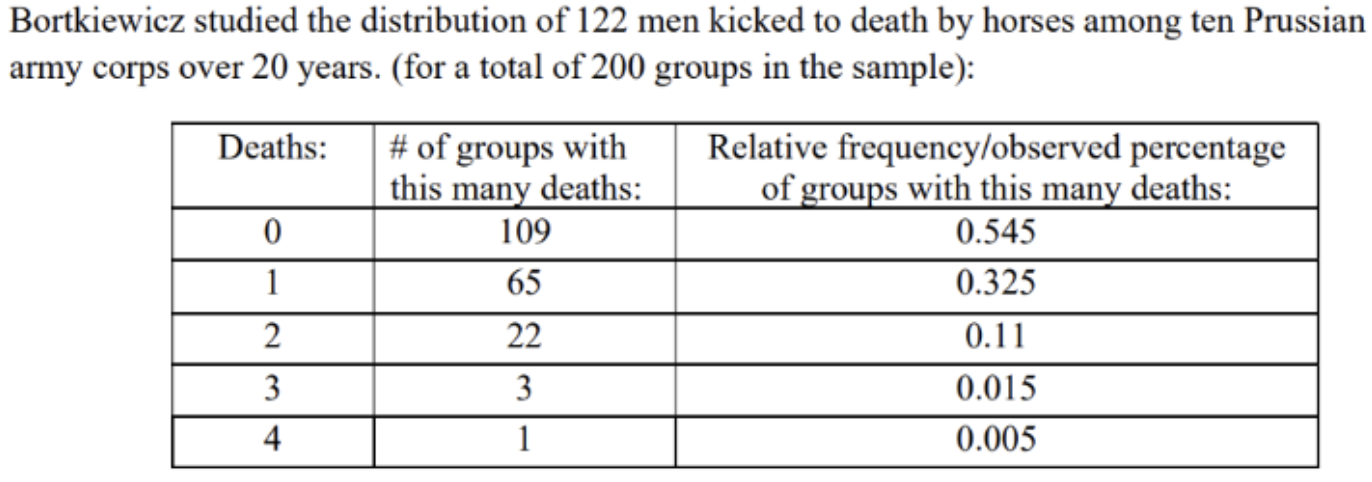

The data essentially consist of 200 total years of Prussian army corps information (i.e. ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting soon, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

### Solution

# #3.1

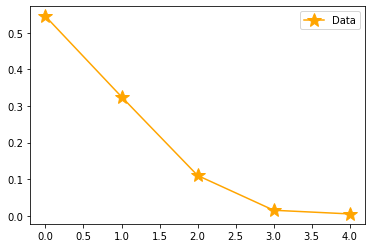

In [257]:
deaths = [0,1,2,3,4]
num_groups = [109,65,22,3,1]
freq = [0.545,0.325,0.11,0.015,0.005]

plt.plot(deaths, freq, '-*', ms=15, color="orange", label="Data")
plt.legend()
plt.show()

# #3.2

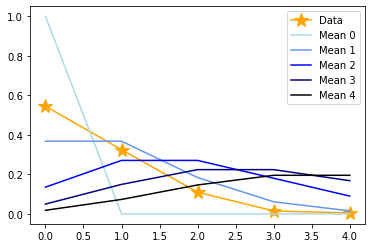

In [258]:
deaths = [0,1,2,3,4]
num_groups = [109,65,22,3,1]
freq = [0.545,0.325,0.11,0.015,0.005]

p0 = poisson.pmf(deaths, 0)
p1 = poisson.pmf(deaths, 1)
p2 = poisson.pmf(deaths, 2)
p3 = poisson.pmf(deaths, 3)
p4 = poisson.pmf(deaths, 4)

plt.plot(deaths, freq, '-*', ms=15, color="orange", label="Data")
plt.plot(deaths, p0, color="lightblue", label="Mean 0")
plt.plot(deaths, p1, color="cornflowerblue", label="Mean 1")
plt.plot(deaths, p2, color="blue", label="Mean 2")
plt.plot(deaths, p3, color="navy", label="Mean 3")
plt.plot(deaths, p4, color="black", label="Mean 4")
plt.legend()
plt.show()

# #3.3

In [159]:
weighted_mean = np.sum(np.array(deaths)*np.array(freq))
weighted_mean

0.6100000000000001

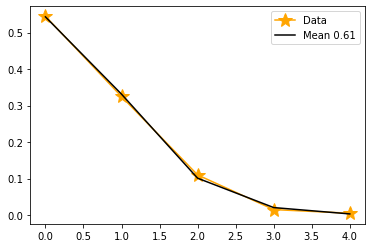

In [161]:
pmean = poisson.pmf(deaths, weighted_mean)

plt.plot(deaths, freq, '-*', ms=15, color="orange", label="Data")
plt.plot(deaths, pmean, color="black", label="Mean 0.61")
plt.legend()
plt.show()